<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Text Styling Example</title>
    <style>
        h1{
            align=right
            style="direction: rtl;
            text-align: right;
            line-height:200%;
            font-family:vazir;
            color:#0099cc;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Review of marriage and divorce in Iran</h1>

</body>
</html>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
df=pd.read_csv('dataset/Marriage and divorce in Iran.csv')
df.sample(10,random_state=10)

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
30,1388,890208,125747,…,…,…,…
21,1379,646498,53797,499143,47936,147355,5861
26,1384,787818,84241,558582,70023,229236,14218
7,1365,340342,35211,225011,29379,115331,5832
31,1389,891627,137200,…,…,…,…
23,1381,650960,67256,513772,61074,137188,6182
2,1360,294499,24423,183546,20449,110953,3974
17,1375,479263,37817,357138,32697,122125,5120
18,1376,511401,41816,387276,36459,124125,5357
20,1378,611073,51044,476284,45274,134789,5770


In [42]:
with open("dataset/iran_population.csv", "r") as f:
    lines = f.readlines()

population_dict = {"Year": [], "Population": []}

for i in lines[38:80]:
    year, population = i.split(",")[0:2]
    population_dict["Year"].append(year)
    population_dict["Population"].append(population)

population_df = pd.DataFrame(population_dict)
population_df.head()

,Year,Population
0,1979-12-31,37205013
1,1980-12-31,38520664
2,1981-12-31,40476251
3,1982-12-31,42500030
4,1983-12-31,44027986


In [43]:
urban_df = pd.read_csv("dataset/urban population.csv")
urban_df.loc[:,'1979':'2020'].T.values

array([[48.951],
       [49.693],
       [50.434],
       [51.175],
       [51.916],
       [52.657],
       [53.395],
       [54.133],
       [54.717],
       [55.257],
       [55.794],
       [56.33 ],
       [56.865],
       [57.653],
       [58.519],
       [59.38 ],
       [60.236],
       [61.087],
       [61.853],
       [62.588],
       [63.318],
       [64.042],
       [64.758],
       [65.468],
       [66.172],
       [66.869],
       [67.558],
       [68.239],
       [68.864],
       [69.458],
       [70.045],
       [70.626],
       [71.2  ],
       [71.755],
       [72.295],
       [72.83 ],
       [73.358],
       [73.88 ],
       [74.394],
       [74.898],
       [75.391],
       [75.874]])

In [44]:
df['population']=population_df['Population']
df['urban_population']=urban_df.loc[:,'1979':'2020'].T.values
df.head()

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village),population,urban_population
0,1358,302667,21170,173963,15445,128704,5725,37205013,48.951
1,1359,337119,23987,196029,19293,141090,4694,38520664,49.693
2,1360,294499,24423,183546,20449,110953,3974,40476251,50.434
3,1361,353944,31221,215077,25773,138867,5448,42500030,51.175
4,1362,410799,35867,259433,30808,151366,5059,44027986,51.916


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42 non-null     object 
 1   marriage(country)  42 non-null     int64  
 2   divorce(country)   42 non-null     int64  
 3   marriage(city)     42 non-null     object 
 4   divorce(city)      42 non-null     object 
 5   marriage(village)  42 non-null     object 
 6   divorce(village)   42 non-null     object 
 7   population         42 non-null     object 
 8   urban_population   42 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.1+ KB


In [46]:
df[df == "…"] = "0"

columns = ["marriage(city)", "divorce(city)", "marriage(village)", "divorce(village)",'population']

for i in columns:
    df[i] = pd.to_numeric(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42 non-null     object 
 1   marriage(country)  42 non-null     int64  
 2   divorce(country)   42 non-null     int64  
 3   marriage(city)     42 non-null     int64  
 4   divorce(city)      42 non-null     int64  
 5   marriage(village)  42 non-null     int64  
 6   divorce(village)   42 non-null     int64  
 7   population         42 non-null     int64  
 8   urban_population   42 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 3.1+ KB


In [47]:
df.describe()

,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village),population,urban_population
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.00000
mean,570815.952381,80200.785714,352157.738095,58516.214286,114388.547619,7014.333333,6.431098e+07,63.18869
std,181609.291571,56408.667813,190464.079844,55333.674126,53638.221889,4332.760049,1.414009e+07,8.29240
min,294499.000000,21170.000000,0.000000,0.000000,0.000000,0.000000,3.720501e+07,48.95100
25%,429055.500000,34848.000000,228948.250000,27066.750000,110523.250000,4838.500000,5.418196e+07,55.92800
50%,541869.500000,52420.500000,336718.000000,32283.000000,123417.000000,5908.500000,6.500956e+07,63.68000
75%,699875.000000,134336.750000,498264.500000,68570.500000,143571.750000,10605.000000,7.511106e+07,70.48075
max,891627.000000,183193.000000,678870.000000,170688.000000,229236.000000,17051.000000,8.729019e+07,75.87400


In [48]:
(df==0).sum()

Year                 0
marriage(country)    0
divorce(country)     0
marriage(city)       5
divorce(city)        5
marriage(village)    5
divorce(village)     5
population           0
urban_population     0
dtype: int64

In [49]:
df.head()

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village),population,urban_population
0,1358,302667,21170,173963,15445,128704,5725,37205013,48.951
1,1359,337119,23987,196029,19293,141090,4694,38520664,49.693
2,1360,294499,24423,183546,20449,110953,3974,40476251,50.434
3,1361,353944,31221,215077,25773,138867,5448,42500030,51.175
4,1362,410799,35867,259433,30808,151366,5059,44027986,51.916


In [50]:
df_without_no_missing_val = df[df["marriage(city)"] != 0]

mean_of_marriage_city_per_country = (
    df_without_no_missing_val["marriage(city)"].div(
        df_without_no_missing_val["marriage(country)"]
    ) * 100
).mean()

mean_of_marriage_village_per_country = 100 - mean_of_marriage_city_per_country

mean_of_divorce_city_per_country = (
    df_without_no_missing_val["divorce(city)"].div(
        df_without_no_missing_val["divorce(country)"]
    ) * 100
).mean()

mean_of_divorce_village_per_country = 100 - mean_of_divorce_city_per_country


In [51]:
missing_rows=df[(df.loc[:,'marriage(city)':'divorce(village)']==0).all(axis=1)]

missing_rows['marriage(city)']=round((missing_rows['marriage(country)'])*(mean_of_marriage_city_per_country/100))
missing_rows['marriage(village)']=missing_rows['marriage(country)']-missing_rows['marriage(city)']

missing_rows['divorce(city)']=round((missing_rows['divorce(country)'])*(mean_of_marriage_city_per_country/100))
missing_rows['divorce(village)']=missing_rows['divorce(country)']-missing_rows['divorce(city)']

if (df[28:33]==0).any().any():
    df[28:33]=missing_rows


(df==0).sum()

Year                 0
marriage(country)    0
divorce(country)     0
marriage(city)       0
divorce(city)        0
marriage(village)    0
divorce(village)     0
population           0
urban_population     0
dtype: int64

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        h1{
            align=right
            style="direction: rtl;
            text-align: right;
            line-height:200%;
            font-family:vazir;
            color:#0099cc;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>PART 2</h1>

</body>
</html>

In [52]:
df_copy=df.copy()


df_copy['divorce_rate_country'] = (
    df_copy["divorce(country)"] / df_copy["population"]
) * 100
df_copy['divorce_rate_city'] = (df_copy["divorce(city)"] / df_copy["population"] * (df_copy['urban_population']/100)) * 100
df_copy['divorce_rate_village'] = (
    df_copy["divorce(village)"] / (df_copy["population"] * ((100 - df_copy['urban_population'])/100))
) * 100



df_copy['marriage_rate_country'] = (
    df_copy["marriage(country)"] / df_copy["population"]
) * 100

df_copy['marriage_rate_city'] = (df_copy["marriage(city)"] / df_copy["population"] * (df_copy['urban_population']/100)) * 100

df_copy['mariage_rate_village'] = (
    df_copy["marriage(village)"] / (df_copy["population"] * ((100 - df_copy['urban_population'])/100))
) * 100



df_copy.tail()



,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village),population,urban_population,divorce_rate_country,divorce_rate_city,divorce_rate_village,marriage_rate_country,marriage_rate_city,mariage_rate_village
37,1395,704716,181049,616042,168774,88674,12275,83306231,73.880,0.217329,0.149677,0.056412,0.845934,0.546336,0.407517
38,1396(2),608867,179709,542917,168359,65950,11350,84505076,74.394,0.212661,0.148215,0.052453,0.720509,0.477957,0.304783
39,1397(2),550565,175614,486661,164124,63904,11490,85617562,74.898,0.205114,0.143575,0.053462,0.643051,0.425730,0.297342
40,1398,533174,176814,470687,164657,62487,12157,86564202,75.391,0.204258,0.143404,0.057068,0.615929,0.409933,0.293331
41,1399,556731,183193,490438,170688,66293,12505,87290193,75.874,0.209867,0.148365,0.059379,0.637793,0.426296,0.314787


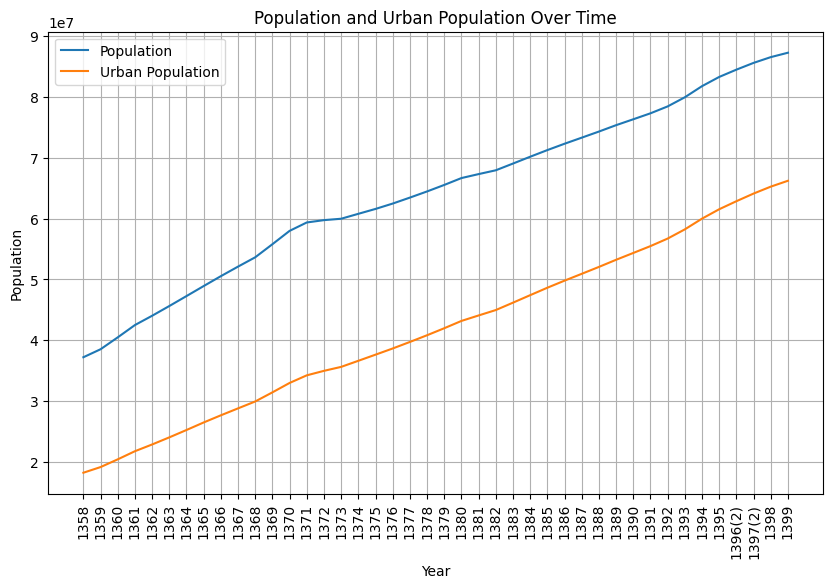

In [53]:
# prompt: create chart of population and urban_population

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['population'], label='Population')
plt.plot(df['Year'],df['population'] * ( df['urban_population']/100 ), label='Urban Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population and Urban Population Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


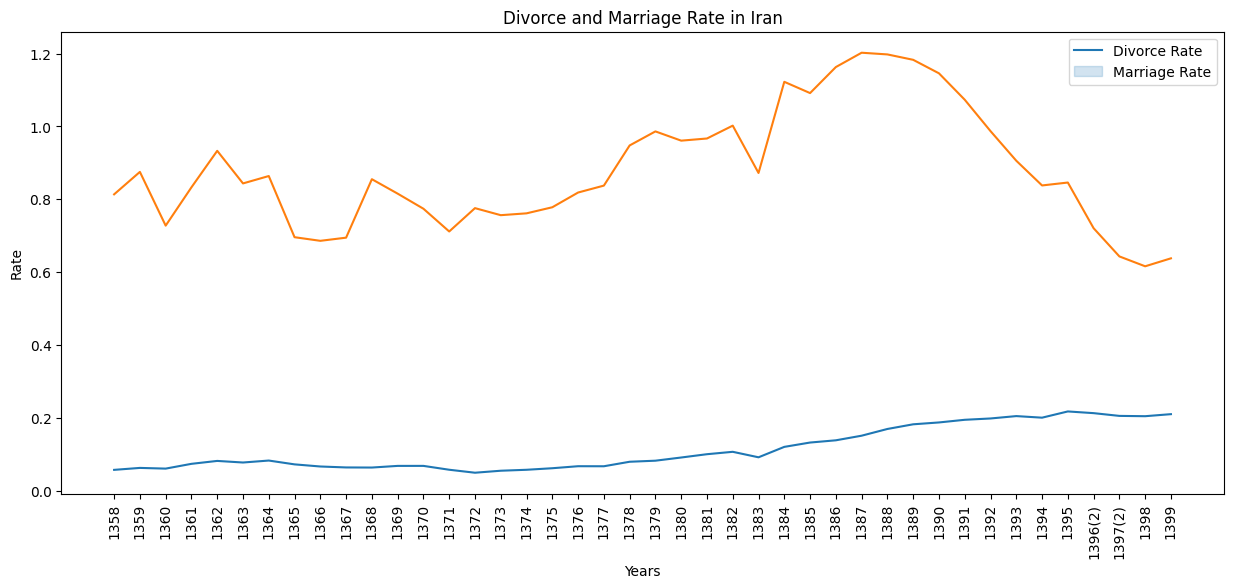

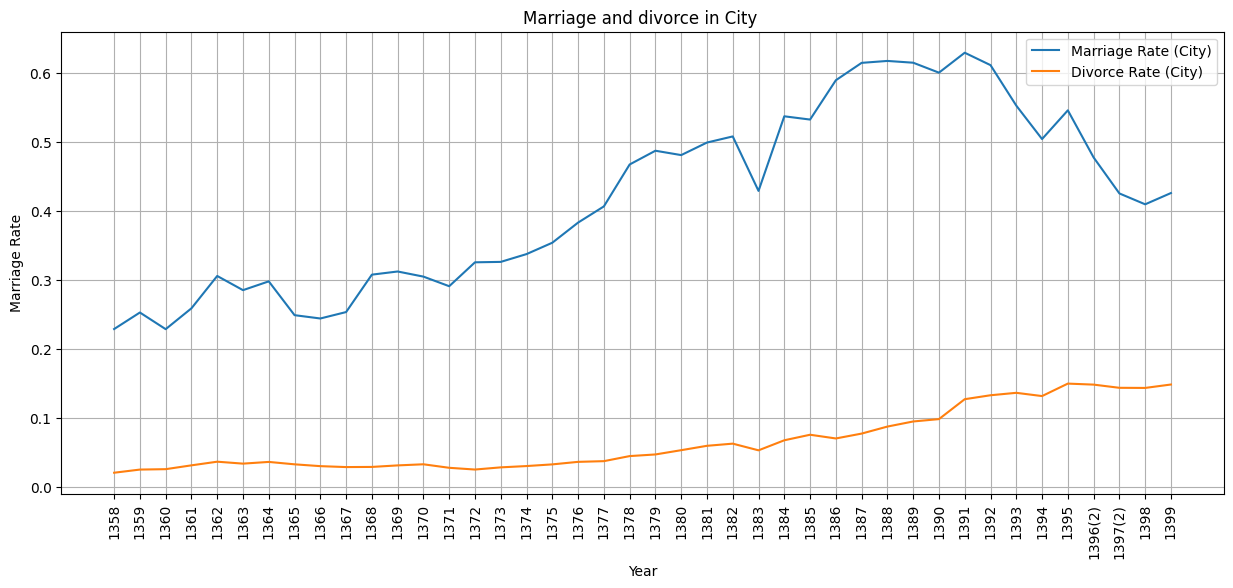

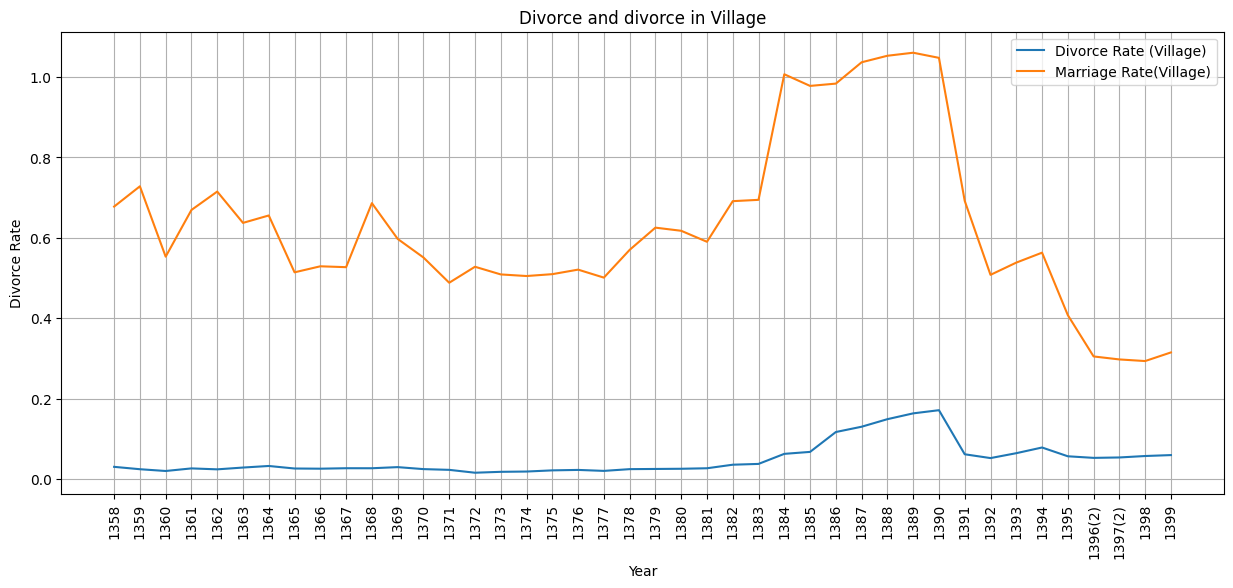

In [54]:
# prompt: create divorce and marriage rate chart for each year

plt.figure(figsize=(15, 6))
sns.lineplot(x="Year", y="divorce_rate_country", data=df_copy)
sns.lineplot(x="Year", y="marriage_rate_country", data=df_copy)
plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Divorce and Marriage Rate in Iran")
plt.legend(["Divorce Rate", "Marriage Rate"])
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(15, 6))
plt.plot(df_copy["Year"], df_copy["marriage_rate_city"], label="Marriage Rate (City)")
plt.plot(df_copy["Year"], df_copy["divorce_rate_city"], label="Divorce Rate (City)")
plt.xlabel("Year")
plt.ylabel("Marriage Rate")
plt.title("Marriage and divorce in City ")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 6))
plt.plot(df_copy["Year"], df_copy["divorce_rate_village"], label="Divorce Rate (Village)")
plt.plot(df_copy["Year"], df_copy["mariage_rate_village"], label="Marriage Rate(Village)")
plt.xlabel("Year")
plt.ylabel("Divorce Rate")
plt.title("Divorce and divorce in Village")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [55]:
divorce_per_marrage_df=df_copy[['Year','marriage(country)','divorce(country)','marriage(city)','divorce(city)','marriage(village)','divorce(village)']]
divorce_per_marrage_df['Country']=(divorce_per_marrage_df['divorce(country)']/divorce_per_marrage_df['marriage(country)'])*100
divorce_per_marrage_df['City']=(divorce_per_marrage_df['divorce(city)']/divorce_per_marrage_df['marriage(city)'])*100
divorce_per_marrage_df['Village']=(divorce_per_marrage_df['divorce(village)']/divorce_per_marrage_df['marriage(village)'])*100
divorce_per_marrage_df=divorce_per_marrage_df.drop(['marriage(country)','divorce(country)','marriage(city)','divorce(city)','marriage(village)','divorce(village)'],axis=1)

divorce_per_marrage_df


,Year,Country,City,Village
0,1358,6.994486,8.878325,4.448191
1,1359,7.115292,9.841911,3.326954
2,1360,8.293067,11.141076,3.581697
3,1361,8.820887,11.983150,3.923178
4,1362,8.731034,11.875128,3.342230
5,1363,9.140087,11.747886,4.454924
6,1364,9.548057,12.076943,4.926627
7,1365,10.345770,13.056695,5.056750
8,1366,9.644543,12.230567,4.827148
9,1367,9.148904,11.247830,5.063899


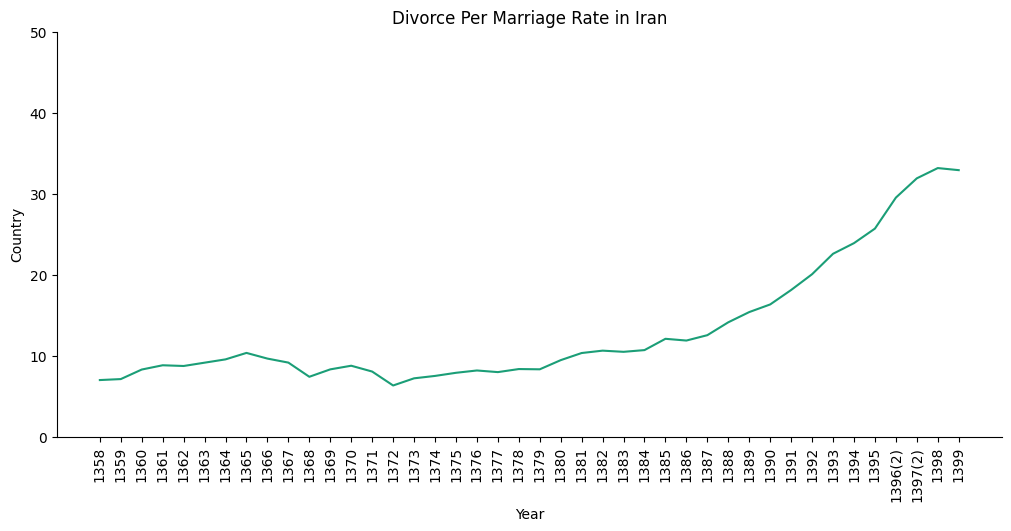

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Country']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = divorce_per_marrage_df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Divorce Per Marriage Rate in Iran')
plt.ylim(0, 50)
plt.xticks(rotation=90)
plt.xlabel('Year')
_ = plt.ylabel('Country')

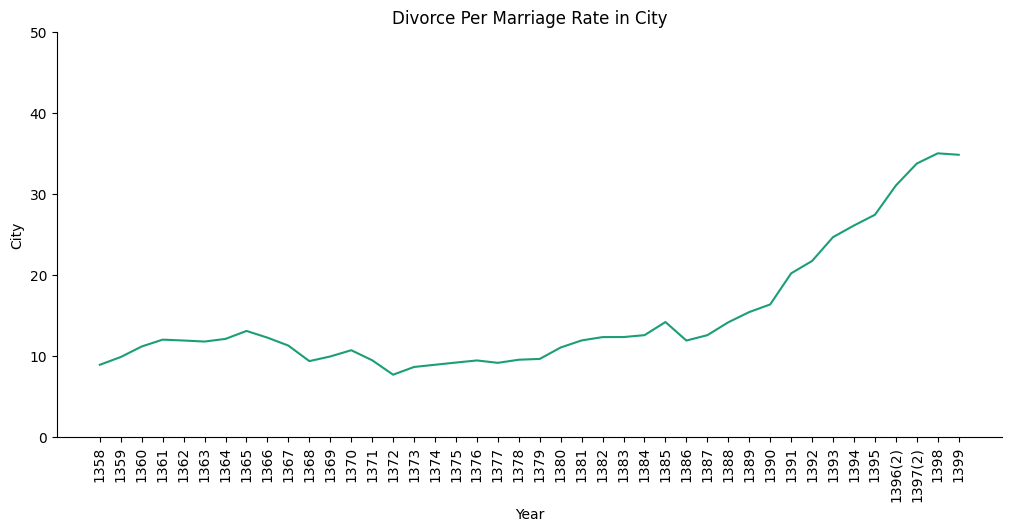

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['City']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = divorce_per_marrage_df.sort_values('Year', ascending=True)
plt.ylim(0, 50)
plt.xticks(rotation=90)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Divorce Per Marriage Rate in City')
plt.xlabel('Year')
_ = plt.ylabel('City')

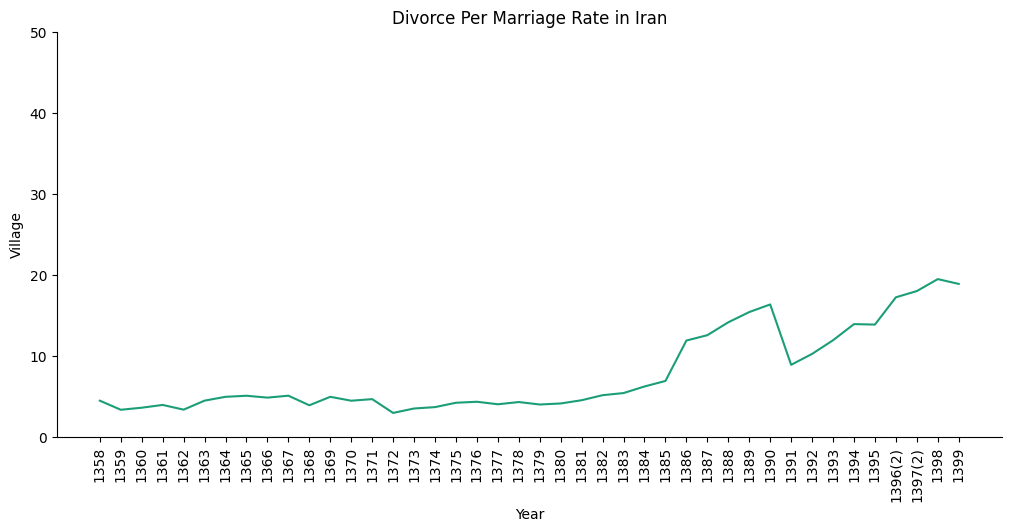

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Village']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = divorce_per_marrage_df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Divorce Per Marriage Rate in Iran')
plt.ylim(0, 50)
plt.xticks(rotation=90)
plt.xlabel('Year')
_ = plt.ylabel('Village')